In [1]:
import pyfesom2 as pf
import xarray as xr
import os
import pandas as pd
from collections import OrderedDict
from itertools import product
import matplotlib.pylab as plt
%matplotlib inline

In [52]:
# parameters cell
meshpath = "/Users/nkolduno/PYTHON/DATA/core2_meanz_mesh/"
abg = [50, 15, -90]
variable = 'temp'
input_paths = [
    
    "/Users/nkolduno/PYTHON/DATA/output_7_10",
    "/Users/nkolduno/PYTHON/DATA/output_7_8/"
]
input_names = ['opt1', 'opt2']
years = range(1978, 1986)
rowscol=[1,2]
bbox = [-180, 180, -80, 90]
res = [360, 180]
mapproj='pc'
figsize=(24, 14)
depth = 0
levels = [-1, 30, 41]
units = r'$^\circ$C'
dpi=200
how="mean"
ofile = None

In [53]:
if input_names is None:
    input_names = []
    for run in input_paths:
        run = os.path.join(run, '')
        input_names.append(run.split('/')[-2])

In [54]:
mesh = pf.load_mesh(meshpath, abg=abg, 
                    usepickle=True, usejoblib=False)

/Users/nkolduno/PYTHON/DATA/core2_meanz_mesh/pickle_mesh_py3_fesom2
The usepickle == True)
The pickle file for FESOM2 exists.
The mesh will be loaded from /Users/nkolduno/PYTHON/DATA/core2_meanz_mesh/pickle_mesh_py3_fesom2


In [55]:
plotds = OrderedDict()
plotds[depth] = {}
for exp_path, exp_name  in zip(input_paths, input_names):
    data_test      = pf.get_data(exp_path, variable, years, mesh, depth = depth, how=how, compute=True, silent=True)
    title = exp_name
    plotds[depth][title] = {}
    plotds[depth][title]['data'] = data_test

In [56]:
def data_to_plot(plotds, depth):
    plot_data = []
    plot_names = []
    for key, value in plotds[depth].items():
        plot_data.append(value['data'])
        plot_names.append(key)
                
    return plot_data, plot_names

In [57]:
plot_data, plot_names = data_to_plot(plotds, depth)

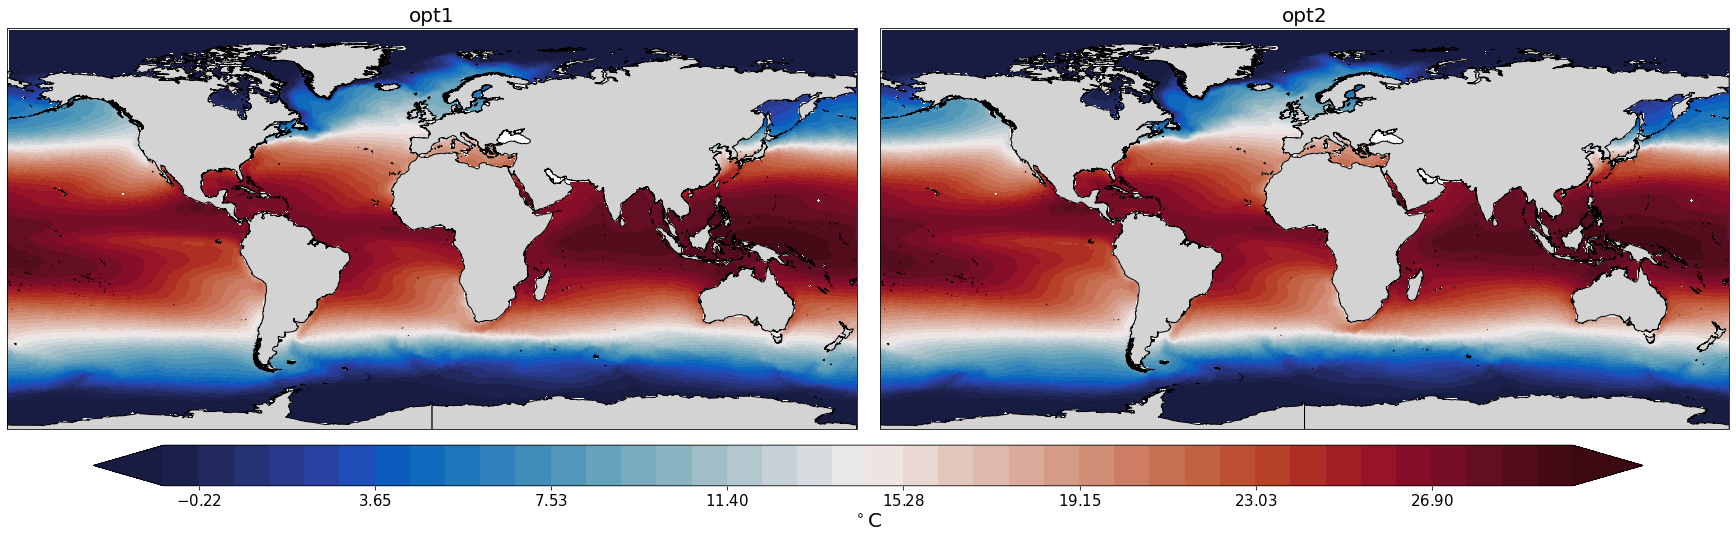

In [58]:
pf.plot(mesh, 
    plot_data,
    rowscol=rowscol,
    titles=plot_names,
    mapproj=mapproj,
    cmap='balance', 
    levels=levels,
    figsize = figsize, 
    box=bbox, 
    res = res,
    units = units);
if ofile is not None:
    plt.savefig(ofile, dpi=dpi)
    os.system(f'convert {ofile} -trim {ofile}_trimmed.png')
    os.system(f'mv {ofile}_trimmed.png {ofile}')